## Data visualization and analysis

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
# load the dataset
taxis = sns.load_dataset('taxis')
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


#### Column Description:

- pickup: Pickup date and time.
- dropoff: Drop-off date and time.
- passengers: Number of passengers.
- distance: Distance traveled in miles.
- fare: Fare amount.
- tip: Extra tip amount.
- tolls: Toll tax amount.
- total: Total payment including fare, tip, and tolls.
- color: Color of the taxi.
- payment: Payment method (e.g., credit card, cash).



In [28]:
# Shape of the df

shape = taxis.shape

print(f'The shape of the dataset is: {shape}')

The shape of the dataset is: (6433, 14)


In [27]:
# Let's have a look of statical distribution of the datasets
taxis.describe()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total
count,6433,6433,6433.000000,6433.000000,6433.000000,6433.00000,6433.000000,6433.000000
mean,2019-03-16 08:31:28.514223616,2019-03-16 08:45:49.491217408,1.539251,3.024617,13.091073,1.97922,0.325273,18.517794
min,2019-02-28 23:29:03,2019-02-28 23:32:35,0.000000,0.000000,1.000000,0.00000,0.000000,1.300000
25%,2019-03-08 15:50:34,2019-03-08 16:12:51,1.000000,0.980000,6.500000,0.00000,0.000000,10.800000
50%,2019-03-15 21:46:58,2019-03-15 22:06:44,1.000000,1.640000,9.500000,1.70000,0.000000,14.160000
75%,2019-03-23 17:41:38,2019-03-23 17:51:56,2.000000,3.210000,15.000000,2.80000,0.000000,20.300000
max,2019-03-31 23:43:45,2019-04-01 00:13:58,6.000000,36.700000,150.000000,33.20000,24.020000,174.820000
std,NaN,NaN,1.203768,3.827867,11.551804,2.44856,1.415267,13.815570


As we can see minimum, maximum, mean, median of all numeric colomns above.

It will be even more clear when we take those datas into plots.

In [31]:
# Dataset information
taxis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [32]:
# check null values
taxis.isnull().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [33]:
# fill null values with mode

taxis = taxis.fillna(taxis.mode().iloc[0])

In [34]:
# check null values to ensure there isn't any
taxis.isna().sum()

pickup             0
dropoff            0
passengers         0
distance           0
fare               0
tip                0
tolls              0
total              0
color              0
payment            0
pickup_zone        0
dropoff_zone       0
pickup_borough     0
dropoff_borough    0
dtype: int64

# Analysis of Taxi Dataset

Let's analyze the dataset using three different approaches:

1. **Univariate Analysis**: Analyzing one variable at a time
2. **Bivariate Analysis**: Analyzing relationships between pairs of variables
3. **Multivariate Analysis**: Analyzing relationships between three or more variables

## 1. Univariate Analysis

Univariate analysis examines each variable in the dataset independently. This helps us understand:
- The distribution of values
- Central tendencies (mean, median, mode)
- Spread of the data (variance, standard deviation)
- Presence of outliers

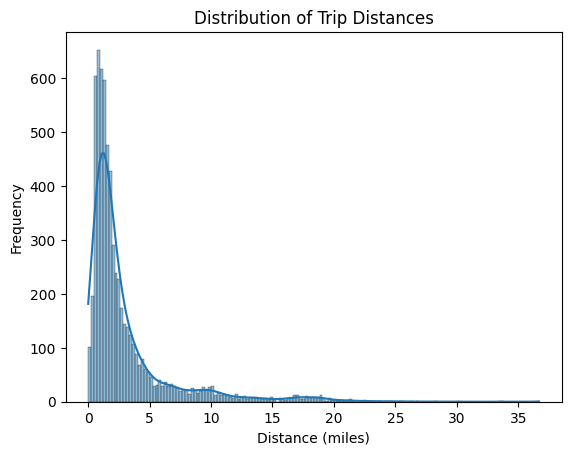

In [100]:
# Numerical Variables Distribution

# Distance Distribution
sns.histplot(data=taxis, x='distance', kde=True)
plt.title('Distribution of Trip Distances')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')
plt.show()




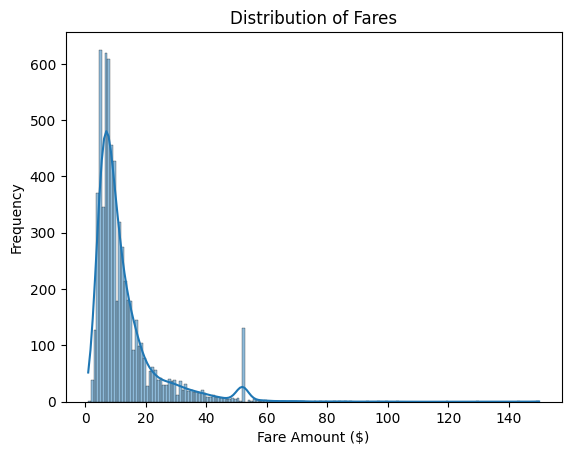

In [101]:
# Fare Distribution
sns.histplot(data=taxis, x='fare', kde=True)
plt.title('Distribution of Fares')
plt.xlabel('Fare Amount ($)')
plt.ylabel('Frequency')
plt.show()



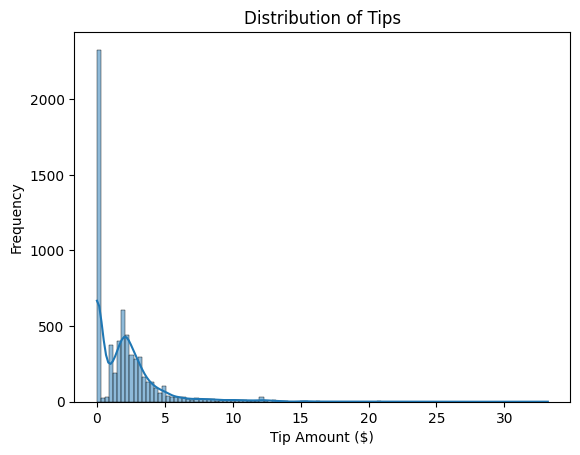

In [102]:
# Tips Distribution
sns.histplot(data=taxis, x='tip', kde=True)
plt.title('Distribution of Tips')
plt.xlabel('Tip Amount ($)')
plt.ylabel('Frequency')
plt.show()



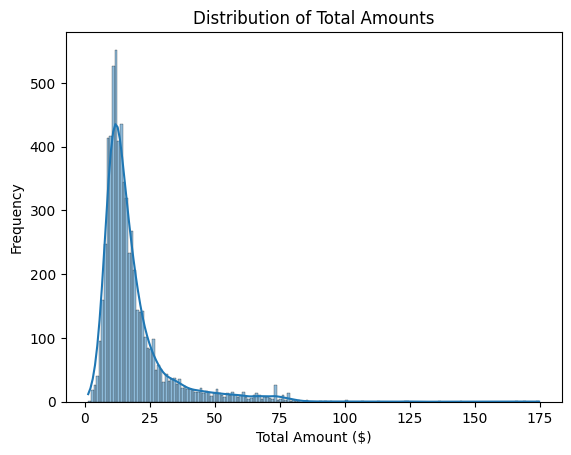

In [103]:
# Total Amount Distribution
sns.histplot(data=taxis, x='total', kde=True)
plt.title('Distribution of Total Amounts')
plt.xlabel('Total Amount ($)')
plt.ylabel('Frequency')
plt.show()

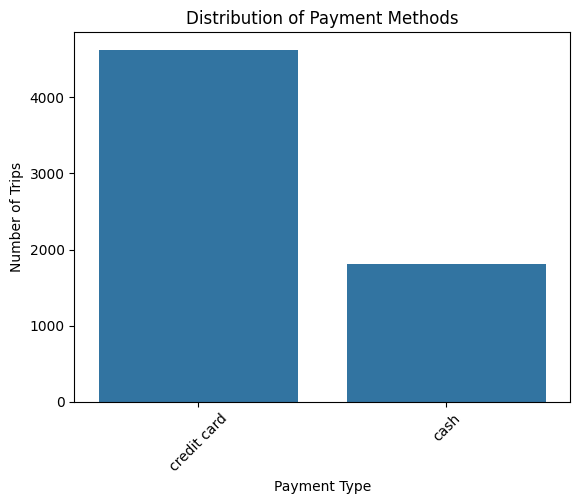

In [105]:
# Categorical Variables Distribution

# Payment Methods Distribution
sns.countplot(data=taxis, x='payment')
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Type')
plt.ylabel('Number of Trips')
plt.xticks(rotation=45)
plt.show()



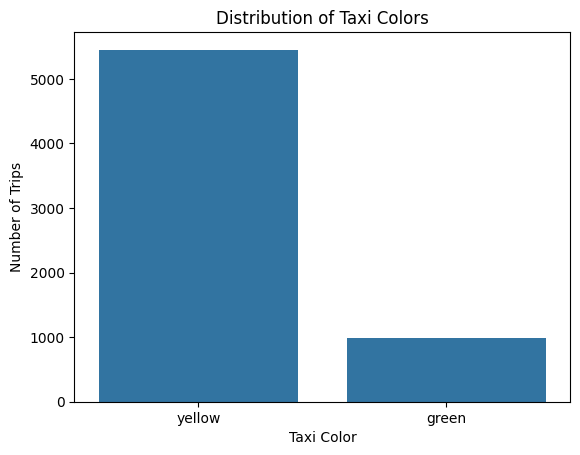

In [106]:
# Taxi Colors Distribution
sns.countplot(data=taxis, x='color')
plt.title('Distribution of Taxi Colors')
plt.xlabel('Taxi Color')
plt.ylabel('Number of Trips')
plt.show()

### Univariate Analysis Insights:

1. **Distance Distribution**: Most trips are short-distance, with a right-skewed distribution
2. **Fare Distribution**: Follows a similar pattern to distance, most fares are in the lower range
4. **Payment Methods**: Credit card payments are more common than cash
5. **Taxi Colors**: There's an uneven distribution between yellow and green taxis

## 2. Bivariate Analysis

Bivariate analysis examines the relationship between pairs of variables. This helps us understand:
- Correlations between variables
- How one variable affects another
- Patterns and trends between pairs of variables

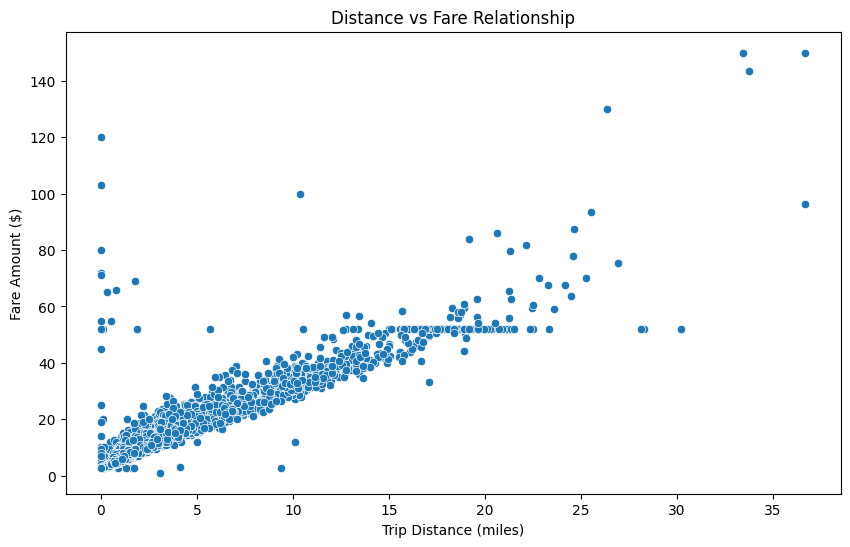

Correlation between distance and fare: 0.92


In [107]:
# Relationship between Distance and Fare
plt.figure(figsize=(10, 6))
sns.scatterplot(data=taxis, x='distance', y='fare')
plt.title('Distance vs Fare Relationship')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.show()

# Calculate correlation
correlation = taxis['distance'].corr(taxis['fare'])
print(f'Correlation between distance and fare: {correlation:.2f}')

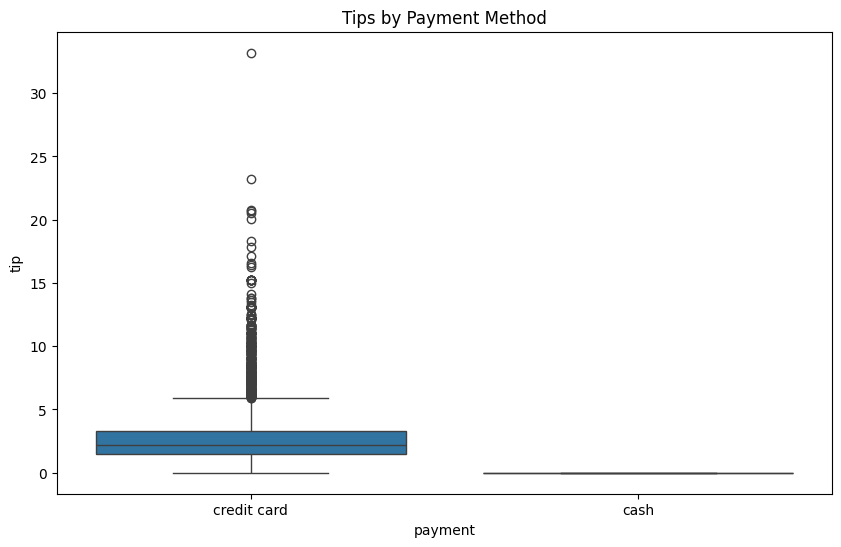

Average tips by payment method:
payment
cash           0.000000
credit card    2.755317
Name: tip, dtype: float64


In [ ]:
# Payment Method vs Tips
plt.figure(figsize=(10, 6))
sns.boxplot(data=taxis, x='payment', y='tip')
plt.title('Tips Distribution by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Tip Amount ($)')
plt.show()

# Average tips by payment method
print('Average tips by payment method:')
print(taxis.groupby('payment')['tip'].mean())

### Bivariate Analysis Insights:

1. **Distance-Fare Relationship**: Strong positive correlation between distance and fare
2. **Payment-Tips**: Credit card payments tend to result in higher tips than cash


## 3. Multivariate Analysis

Multivariate analysis examines relationships between three or more variables simultaneously. This helps us understand:
- Complex relationships between multiple variables
- Combined effects of different factors
- Patterns that might not be visible in simpler analyses

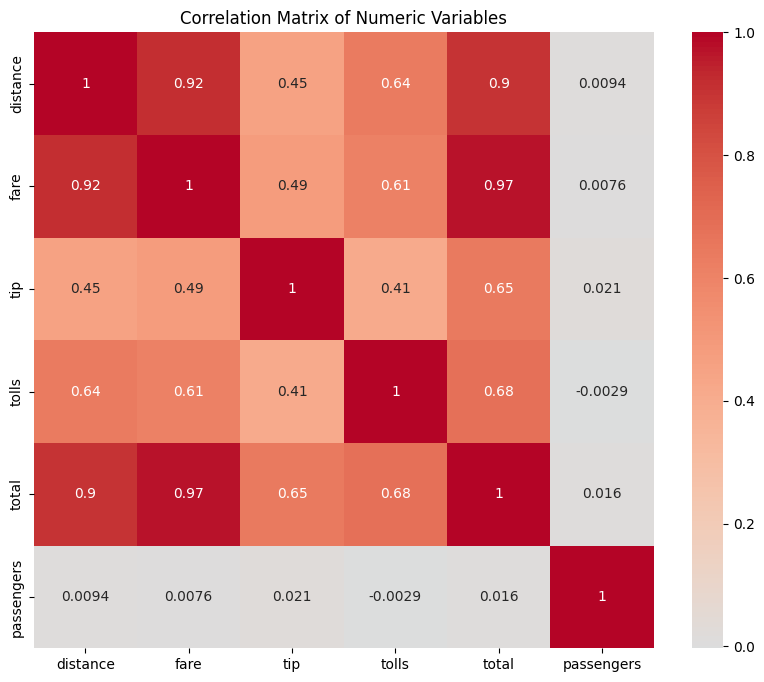

In [ ]:
# Create a correlation matrix heatmap
numeric_cols = ['distance', 'fare', 'tip', 'tolls', 'total', 'passengers']
correlation_matrix = taxis[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numeric Variables')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

### Multivariate Analysis Insights:

1. **Correlation Patterns**:
   - Strong correlation between distance, fare, and total
   - Moderate correlation between tips and total fare
   - Weak correlation between passengers and other variables
